In [29]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [82]:
stock1 = pd.read_excel('sz50.xlsx', sheetname = '600036.XSHG', index_col = 'datetime')
stock2 = pd.read_excel('sz50.xlsx', sheetname = '600050.XSHG', index_col = 'datetime')
stock3 = pd.read_excel('sz50.xlsx', sheetname = '601318.XSHG', index_col = 'datetime')

In [83]:
s1_change = pd.Series(stock1.close.pct_change(3), name = '600036.XSHG')
s2_change = pd.Series(stock2.close.pct_change(3), name = '600050.XSHG')
s3_change = pd.Series(stock3.close.pct_change(3), name = '601318.XSHG')

In [84]:
stock_change = pd.concat([s1_change, s2_change, s3_change], axis = 1).fillna(method='ffill')
print(stock_change.loc['2017-11-14':'2017-11-20'])

                     600036.XSHG  600050.XSHG  601318.XSHG
datetime                                                  
2017-11-14 15:00:00     0.035086    -0.041414     0.061659
2017-11-15 15:00:00     0.029902    -0.029087    -0.009838
2017-11-16 15:00:00     0.015578    -0.035141     0.040733
2017-11-17 15:00:00     0.048565     0.014752     0.068856
2017-11-20 15:00:00     0.095011     0.012397     0.094071


In [85]:
rolling_cov = stock_change.rolling(window = 5).cov()
print(rolling_cov[-6:])
print(type(rolling_cov.index))

                                 600036.XSHG  600050.XSHG  601318.XSHG
datetime                                                              
2017-11-17 15:00:00 600036.XSHG     0.000163     0.000040     0.000060
                    600050.XSHG     0.000040     0.001499     0.000892
                    601318.XSHG     0.000060     0.000892     0.001359
2017-11-20 15:00:00 600036.XSHG     0.000926     0.000636     0.000833
                    600050.XSHG     0.000636     0.000734     0.000623
                    601318.XSHG     0.000833     0.000623     0.001524
<class 'pandas.core.indexes.multi.MultiIndex'>


In [75]:
rp_cov = rolling_cov.to_panel()
print(rp_cov)

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 215 (major_axis) x 3 (minor_axis)
Items axis: 600036.XSHG to 601318.XSHG
Major_axis axis: 2017-01-03 15:00:00 to 2017-11-20 15:00:00
Minor_axis axis: 600036.XSHG to 601318.XSHG


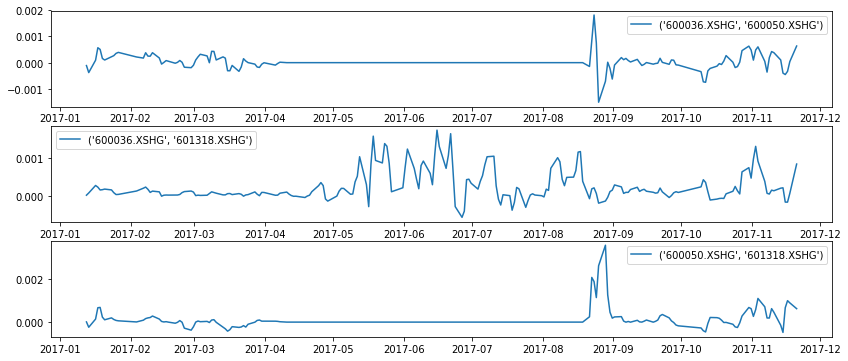

In [104]:
# plt.figure(figsize=(20, 2))
# rolling_cov.unstack()['600036.XSHG', '600050.XSHG']
# print(rolling_cov.unstack()['600036.XSHG', '600050.XSHG'])
# plt.subplot(311)
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (14, 6))
ax1.plot(rolling_cov.unstack()['600036.XSHG', '600050.XSHG'])
ax1.legend(loc='upper right')
ax2.plot(rolling_cov.unstack()['600036.XSHG', '601318.XSHG'])
ax2.legend(loc='upper left')
ax3.plot(rolling_cov.unstack()['600050.XSHG', '601318.XSHG'])
ax3.legend(loc='upper right')
# plt.plot(rolling_cov.unstack()['600036.XSHG', '600050.XSHG'])
# plt.title('')